# Question 1. Significant earthquakes since 2150 B.C.

### sub question 1.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
Sig_Eqs = pd.read_csv('earthquakes-2021-10-23_17-00-59_+0800.tsv',sep='\t').iloc[1:,1:]
df_eq = Sig_Eqs.set_index('Country')
df_top10_deaths=df_eq['Total Deaths'].groupby('Country').sum().sort_values(ascending=False).head(10)

print('the top ten countries along with the total number of deaths are listed:')
for i in range(10):
    print(i+1,':',df_top10_deaths.index[i],'; the number ofdeaths:',int(df_top10_deaths.values[i]))

the top ten countries along with the total number of deaths are listed:
1 : CHINA ; the number ofdeaths: 2041784
2 : TURKEY ; the number ofdeaths: 867454
3 : IRAN ; the number ofdeaths: 758638
4 : SYRIA ; the number ofdeaths: 437700
5 : ITALY ; the number ofdeaths: 359064
6 : JAPAN ; the number ofdeaths: 355137
7 : HAITI ; the number ofdeaths: 323770
8 : AZERBAIJAN ; the number ofdeaths: 310119
9 : INDONESIA ; the number ofdeaths: 280351
10 : ARMENIA ; the number ofdeaths: 189000


### sub question 1.2 

<AxesSubplot:xlabel='Year', ylabel='the number of eqs with larger than 6.0'>

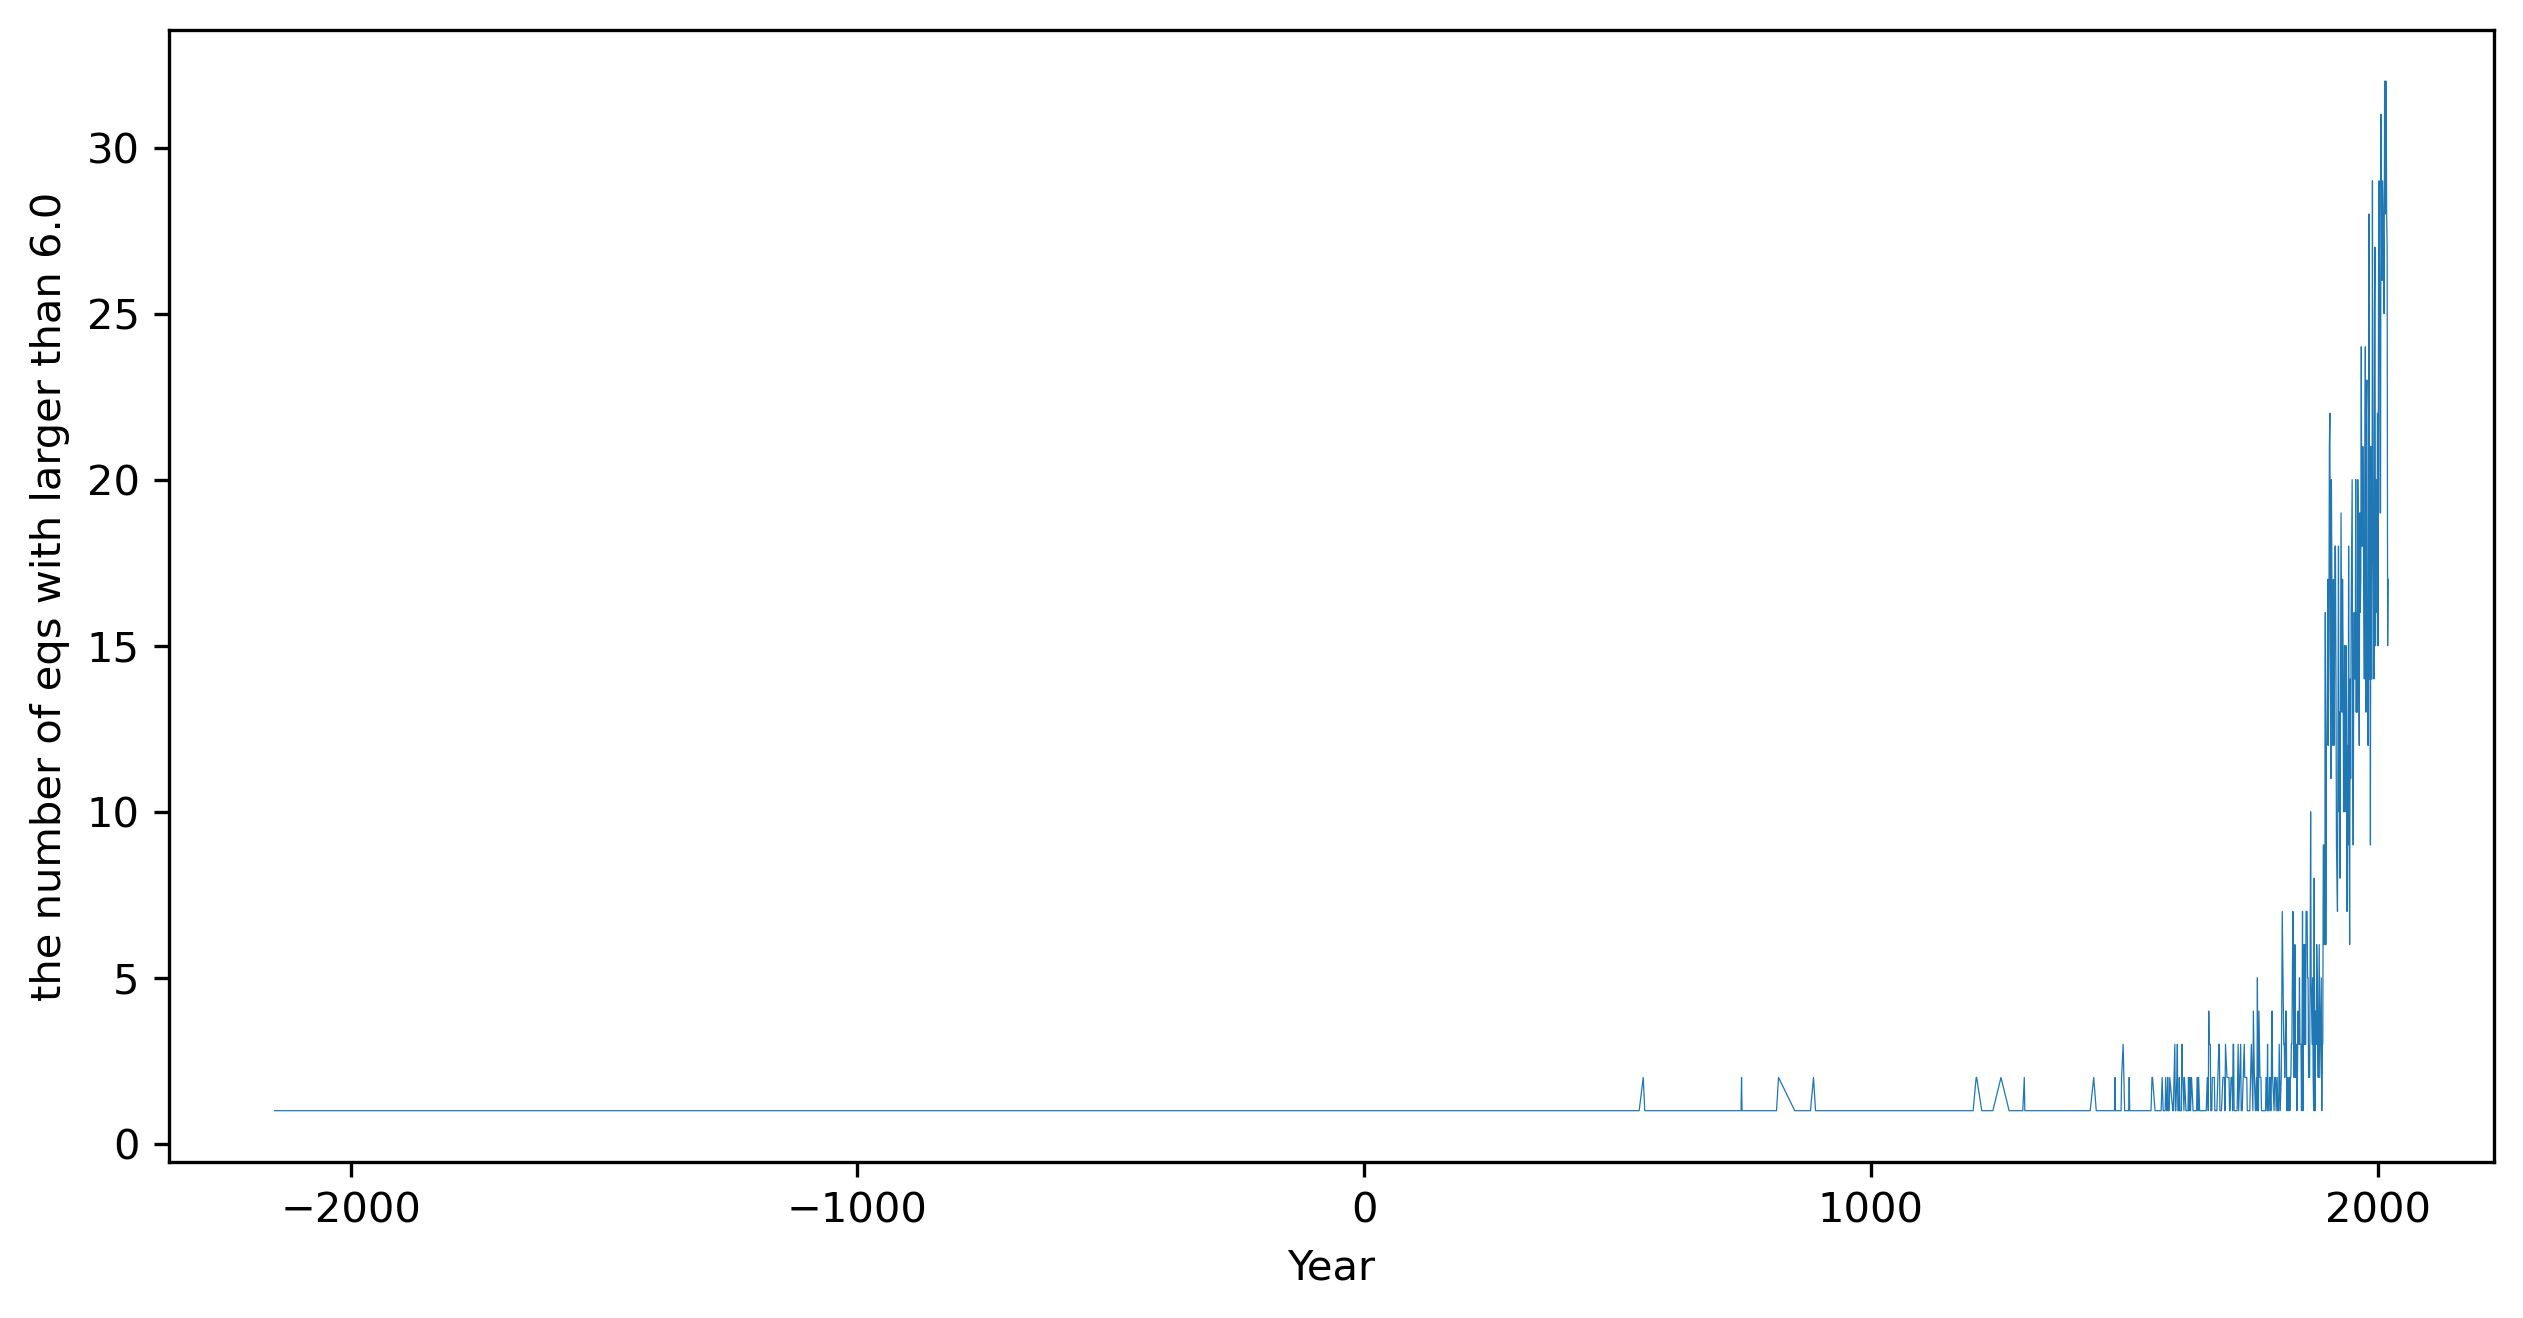

In [3]:
df_plot=Sig_Eqs[Sig_Eqs['Mag']>6.0].groupby('Year').count()['Country']
df_plot.plot(lw=0.3,ylabel='the number of eqs with larger than 6.0',figsize=(10,5))

### sub question 1.3

In [4]:
# function returns count numbers and date by given country name
def CountEq_LargestEQ(country, df_input=Sig_Eqs):

    country=country.upper()
    count=len(Sig_Eqs[Sig_Eqs['Country']==country])

    info_list=Sig_Eqs[Sig_Eqs['Country']==country].sort_values('Mag',ascending=False).iloc[0][['Year','Mo','Dy']]

    date=str(info_list['Year'])[:-2]+'-'+str(info_list['Mo'])[:-2].zfill(2)+'-'+str(info_list['Dy']).zfill(2)

    return count, date

country_list=Sig_Eqs['Country'].unique()
arr_eqs=np.full((country_list.shape[0]-1,2),np.nan)
df_=pd.DataFrame(arr_eqs,index=country_list[0:-1],columns=['count','date of biggest'])

for country in country_list[0:-1]:
    df_.loc[country,['count','date of biggest']]=CountEq_LargestEQ(country)

df_=df_.sort_values('count',ascending=False)

# print the several head lines of result
print('The total numbers of earthquakes in each countries:\n')
print('(Taiwan province of China has not been counted)\n')
for i in range(len(df_)):
    print(int(df_.iloc[i,:]['count']),'\t',df_.index[i].title())


The total numbers of earthquakes in each countries:

(Taiwan province of China has not been counted)

610 	 China
409 	 Japan
401 	 Indonesia
380 	 Iran
330 	 Turkey
326 	 Italy
271 	 Usa
269 	 Greece
221 	 Philippines
204 	 Mexico
198 	 Chile
185 	 Peru
150 	 Russia
99 	 India
98 	 Taiwan
98 	 Papua New Guinea
79 	 Colombia
71 	 New Zealand
66 	 Venezuela
64 	 Ecuador
61 	 Solomon Islands
59 	 Afghanistan
57 	 Algeria
56 	 Albania
54 	 Vanuatu
53 	 Pakistan
49 	 Croatia
43 	 France
40 	 Usa Territory
39 	 Nicaragua
38 	 El Salvador
38 	 Guatemala
35 	 Costa Rica
33 	 Myanmar (Burma)
33 	 Syria
31 	 Switzerland
27 	 Azores (Portugal)
27 	 Spain
26 	 Portugal
26 	 Tajikistan
24 	 Iraq
24 	 Australia
23 	 Israel
23 	 Panama
22 	 Tonga
22 	 Slovenia
21 	 New Caledonia
21 	 Argentina
20 	 Morocco
20 	 Canada
20 	 South Korea
19 	 Jamaica
19 	 Fiji
18 	 Bulgaria
18 	 Dominican Republic
17 	 Kermadec Islands (New Zealand)
17 	 Bangladesh
17 	 Haiti
17 	 Iceland
16 	 Nepal
16 	 Azerbaijan
15 

# Question 2. Wind speed in Shenzhen during the past 10 years

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [6]:
df_input=pd.read_csv('2281305.csv',low_memory=False)
df_windspeed=pd.DataFrame(np.full((len(df_input),1),np.nan),index=df_input['DATE'],columns=['speed rate'])
for i in range(len(df_windspeed)):
    df_windspeed.iloc[i,0]=int(df_input['WND'][i][8:12])
#    if(i%10000==0):
#        print(i,'/',len(df_windspeed),'...')

arr_wind=df_windspeed['speed rate'].values
arr_wind[arr_wind==9999]=np.nan
df_windspeed['speed rate']=arr_wind

df_windspeed.index=pd.to_datetime(df_windspeed.index)
df_monthly=df_windspeed.resample('m').mean()

def plot_timeperiod(start,end,data=df_monthly):
    time=pd.date_range(start=start,end=end,freq='m')
    df_data=pd.DataFrame(index=time,columns=['wind speed'])
    s=(int(start[0:4])-2010)*12+int(start[5:7])-1
    e=(int(end[0:4])-2010)*12+int(end[5:7])-1
    n=e-s
    for i in range(n):
        df_data.iloc[i,0]=data.iloc[s+i,0]/10
    df_data.plot(ylabel='wind speed (m/s)',figsize=(8,5))

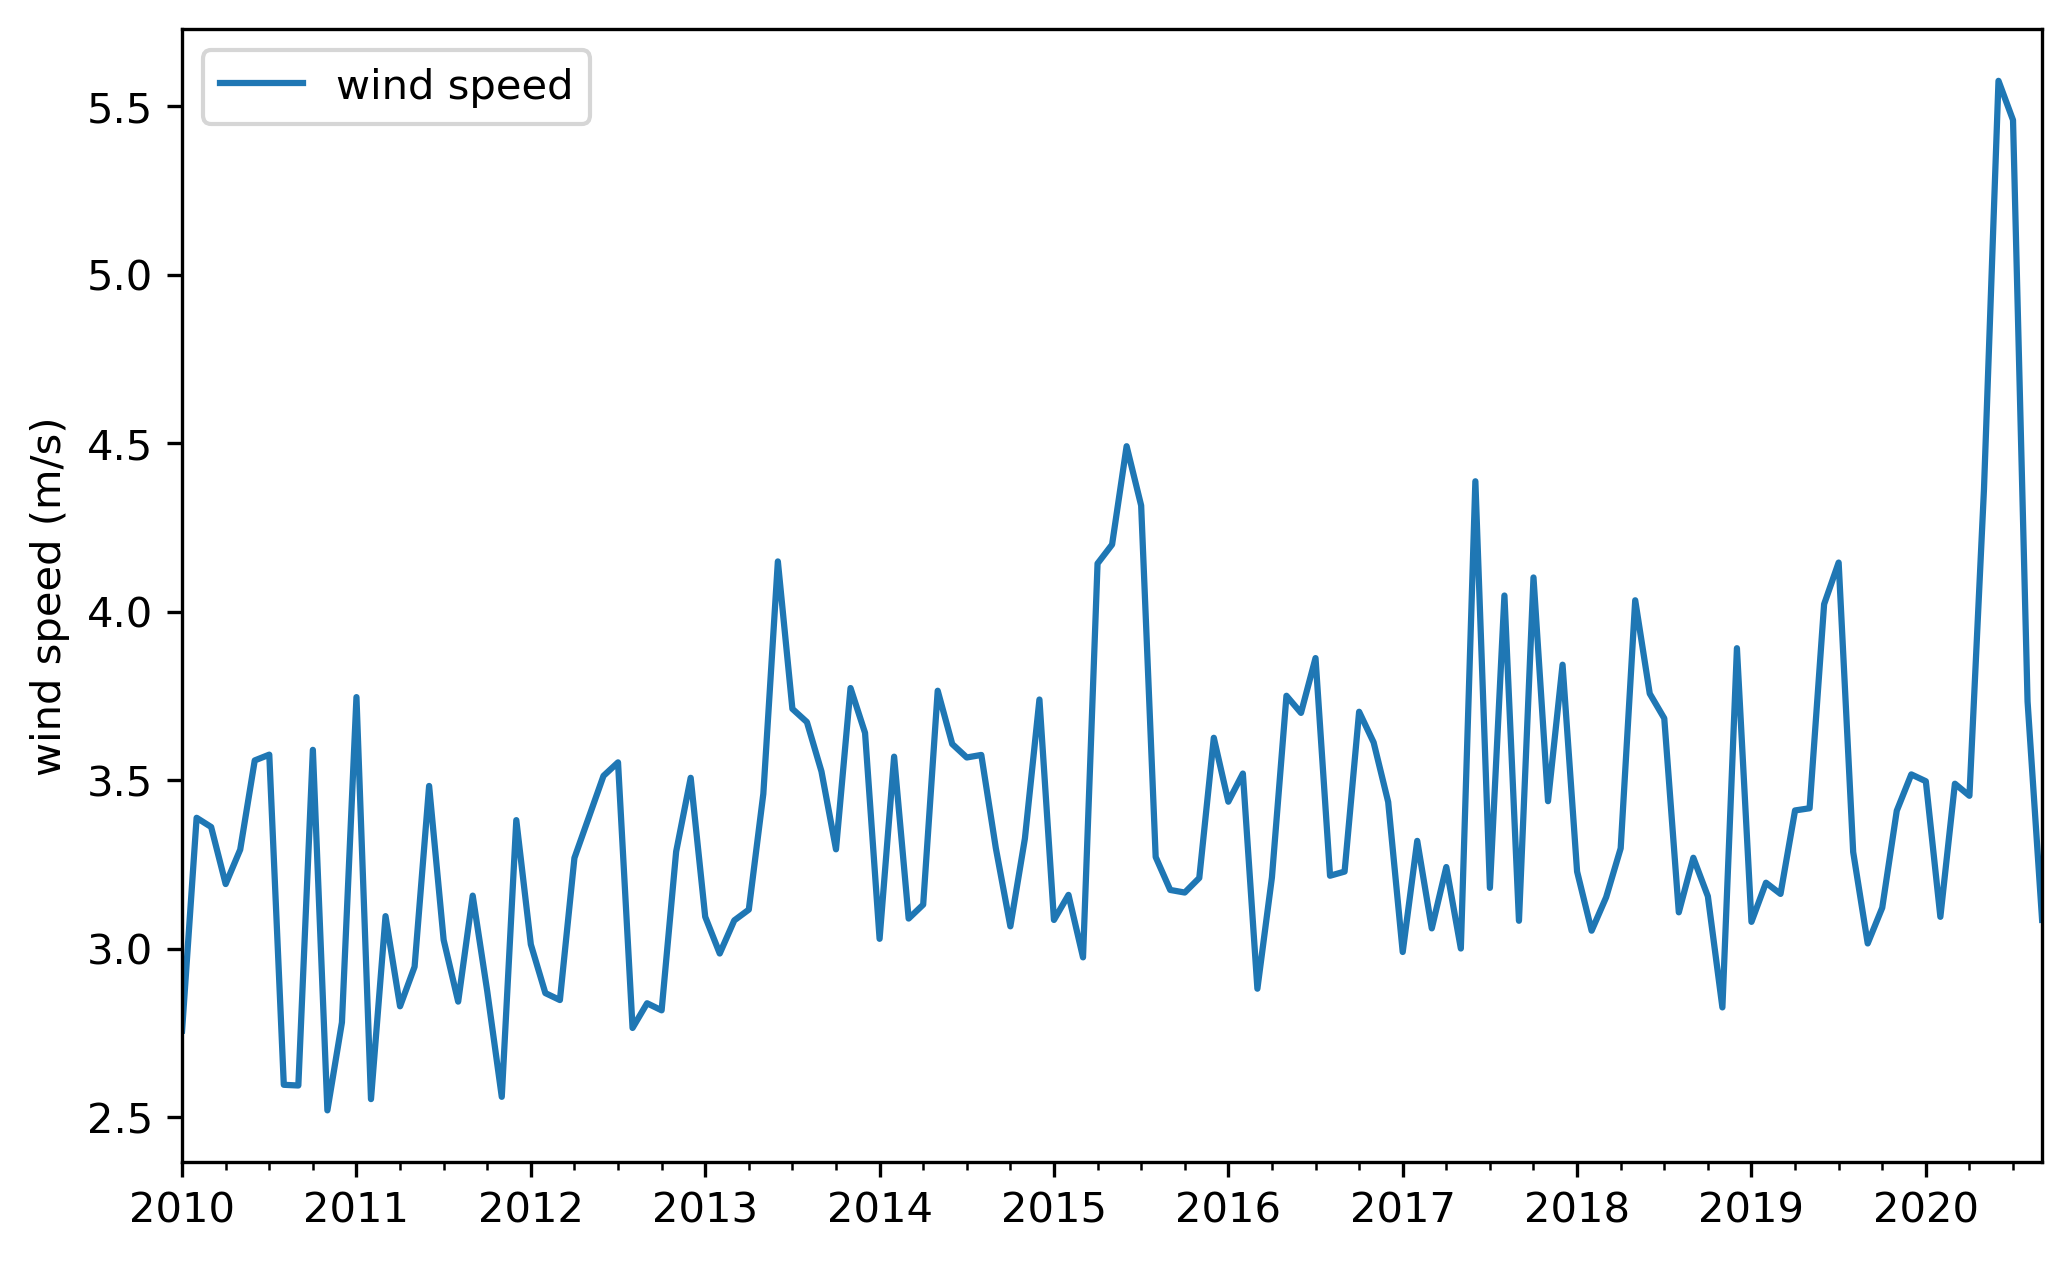

In [7]:
plot_timeperiod('2010-01','2020-10')

# Question 3.Explore a data set

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau

### sub question 3.1

In [9]:
df_3sites=pd.read_csv('data_3stations.csv')
df_3sites=df_3sites.set_index('time')
df_3sites.index=pd.to_datetime(df_3sites.index)

### sub question 3.2

<AxesSubplot:xlabel='Date', ylabel='Discharge of Huaxian'>

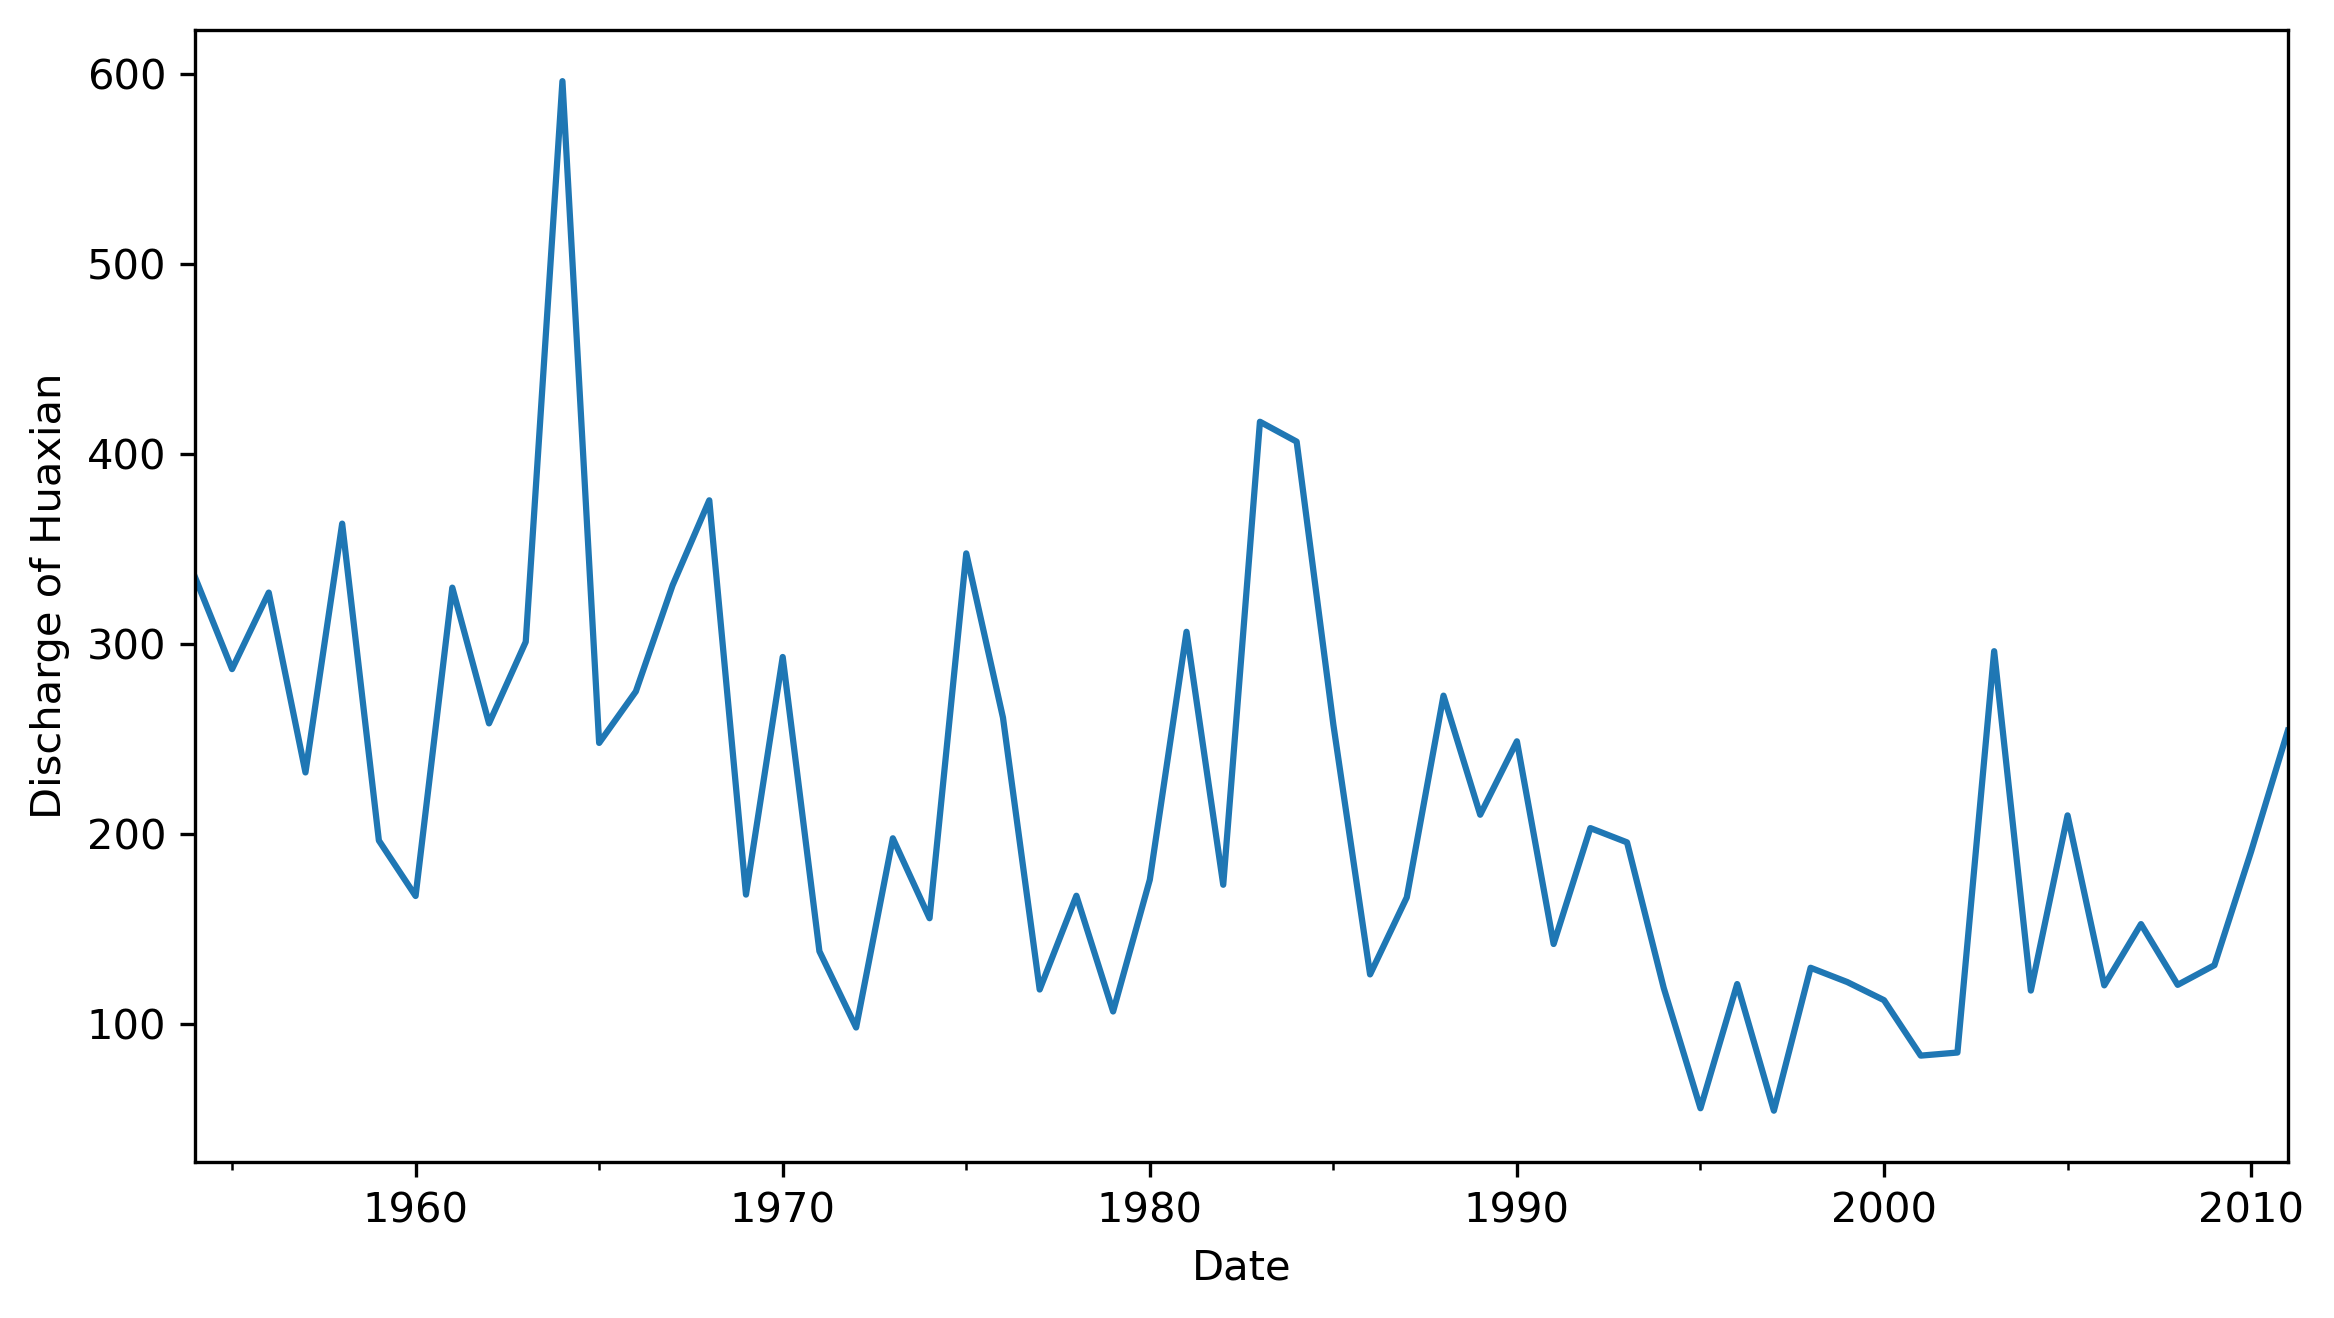

In [10]:
df_annual=df_3sites['huaxian'].resample('y').mean()
df_annual.plot(xlabel='Date',ylabel='Discharge of Huaxian',figsize=(9,5))

### sub question 3.3

In [11]:
def linear_statistic(dat):
    dat0 = np.arange(len(dat))
    dat1 = dat0.copy()

    iddat1 = np.isfinite(dat)
    degree = 1
    x = dat1[iddat1]
    y = dat[iddat1]
    fit = np.polyfit(x, y, degree)
    model = np.poly1d(fit)
    df = pd.DataFrame(columns=['y', 'x'])
    df['x'] = x
    df['y'] = y
    results = smf.ols(formula='y ~ model(x)', data=df).fit()
    slope = fit[0]
    p_value = results.f_pvalue
    fit_fn = np.poly1d(fit)

    # changes, mean of data, trend in percentage, p-value
    return slope * len(dat), np.nanmean(dat), (slope * len(dat)) / np.nanmean(dat) * 100, p_value, fit_fn

change_value,mean_value,change_ratio, significance, linear_fit_params =linear_statistic(df_3sites['huaxian'].resample('y').mean().values)

print('the change value of the data is',change_value.round(2),'mm/yr')
print('the mean value of the data is',mean_value.round(2),'mm/yr')
print('the change ratio of the data is',change_ratio.round(2),'%')
print('the significance of MK test is',significance.round(6),)
print('the linear fit parameters are',linear_fit_params)

the change value of the data is -184.51 mm/yr
the mean value of the data is 214.59 mm/yr
the change ratio of the data is -85.98 %
the significance of MK test is 4.3e-05
the linear fit parameters are  
-3.181 x + 305.3
